# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

## Install Libraries

In [1]:
! pip install keras-ocr

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [2]:
import keras_ocr
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Download and visualize sample image
Here we will be downloading the image for OCR.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


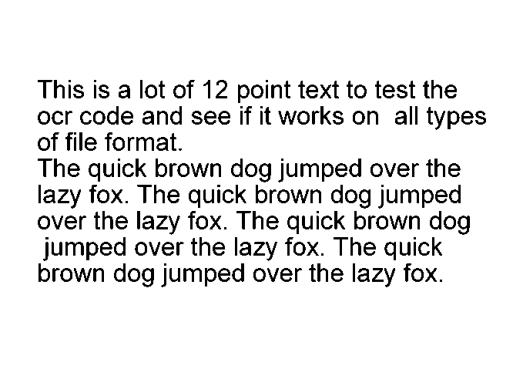

In [4]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/نسخة من OCR_example.png")

# Convert to the right order
# from BGR to RGB (OpenCV uses BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # "RGB" and not "BGR" because we already converted to "RGB"

### Remove noise

In [6]:
image_no_noise = cv2.medianBlur(gray_image, 5)

### Sharpen the image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
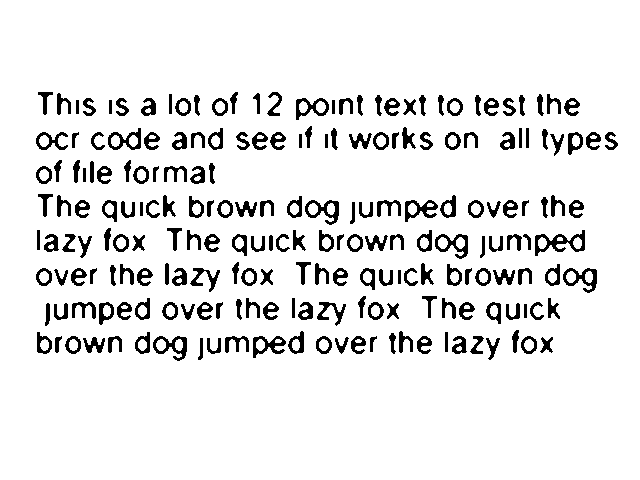

In [7]:

kernel = np.array([[0, -0.25, 0],
                   [-0.25,  2, -0.25],
                   [0, -0.25, 0]])

sharpened_image = cv2.filter2D(image_no_noise, -10, kernel)
sharpened_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
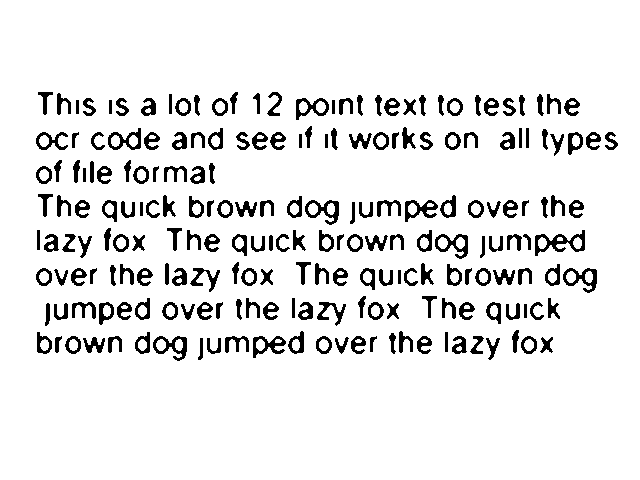

In [8]:

kernel = np.array([[0, -0.5, 0],
                   [-0.5,  3, -0.5],
                   [0, -0.5, 0]])


sharpened_image = cv2.filter2D(image_no_noise, -10, kernel)
sharpened_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
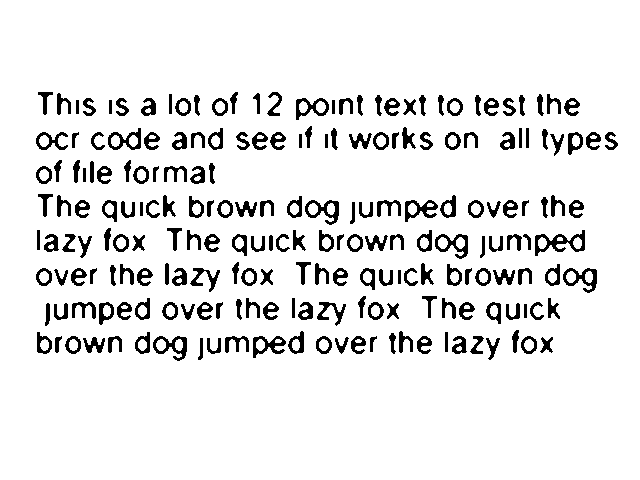

In [9]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
])


sharpened_image = cv2.filter2D(image_no_noise, -10, kernel)
sharpened_image

### Binarize the image

In [21]:
binarizeed_image = cv2.threshold(sharpened_image, 0, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)[1]

## Display preprocessed images
Display the preprocessed images .

(-0.5, 639.5, 479.5, -0.5)

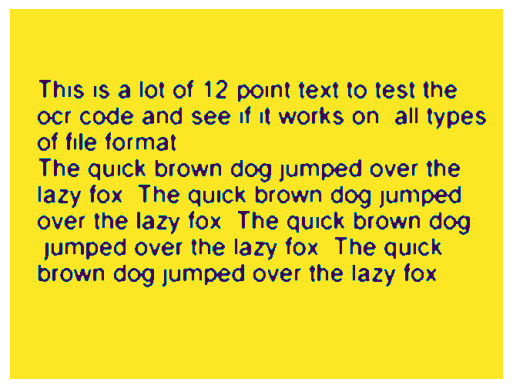

In [22]:
plt.imshow(binarizeed_image)
plt.axis("off")


## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

In [ ]:
# Warning! Don't run this code unless you had an error when creating a pipeline for OCR using KerasOCR in the next code cell
!pip install tensorflow==2.9.1 keras==2.9.0
# After runnig this code you will have to restart the session and import libraries again

In [39]:
# Create a pipeline for OCR using KerasOCR
pipeline = keras_ocr.pipeline.Pipeline()


# KerasOCR requires the image to be passed as a list, even if you're working with a single image
images = [cv2.cvtColor(binarizeed_image, cv2.COLOR_GRAY2RGB)]

# Perform OCR on the image
prediction_groups = pipeline.recognize(images)

# Print the recognized text
for predictions in prediction_groups:
    for prediction in predictions:
        print(prediction[0])


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
2/2 [==============================] - 20s 10s/step
12
this
of
the
lot
point
text
to
test
a
is
code
and
if
warks
it
all
types
ccr
see
on
of
file
format
thne
dog
jumped
thne
quick
brown
over
the
fax
quick
brown
dog
jumped
lazy
thne
the
fox
quick
dog
lazy
brown
over
the
the
fox
quick
jumped
lazy
over
jumped
thne
fax
brown
dog
lazy
over


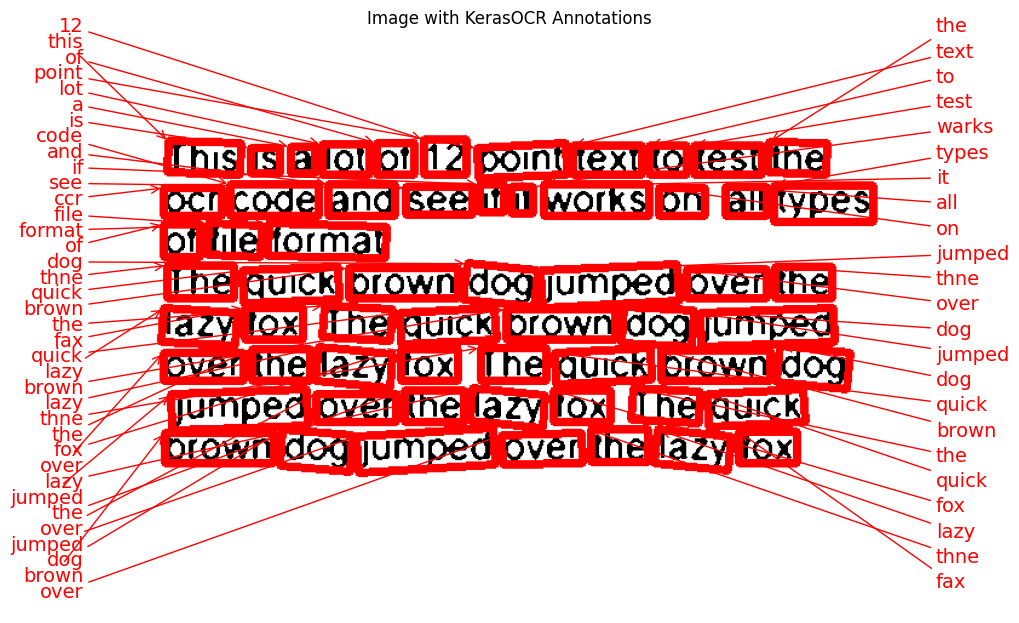

In [40]:

fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)


plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()